<a href="https://colab.research.google.com/github/Ranjit246/espnet_test/blob/main/Common_voice_espnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment3 - Multilingual ASR

**Soft Due Mar. 14th, 11:59pm ET.**

**Due Mar 21st, 11:59pm ET.**

**This is a group assignment, with teams of 2-3 people**

# Learning Objectives

Throughout this assignment, we hope you can achieve the following targets and beyond.

1. Getting faimiliar with ESPnet, one of the modern end-to-end speech recognition (E2E-ASR) toolkits;
2. Knowing the basics of speech recognition database of a specific language;
3. Getting some experience of improving the E2E-ASR performance by tuning model architectures, optimization, feature types, etc;
4. Being familiar with the state-of-the-art self-supervised learning (SSLR) techniques;
5. Gaining some experience of open source activities;
6. Contributing to the multiingual NLP and speech processing communities by making your efforts publicly available.


# Install ESPnet

* Download ESPnet. Here we provide the official ESPnet github repo for demonstration.

* To run the experiments with new corpus, you can fork the ESPnet repo and work on the forked repo of your own.

In [1]:
# It takes 2 seconds
!git clone --depth 5 https://github.com/espnet/espnet

Cloning into 'espnet'...
remote: Enumerating objects: 6249, done.
remote: Counting objects: 100% (6249/6249), done.
remote: Compressing objects: 100% (4284/4284), done.
remote: Total 6249 (delta 2130), reused 3572 (delta 1262), pack-reused 0
Receiving objects: 100% (6249/6249), 14.89 MiB | 12.55 MiB/s, done.
Resolving deltas: 100% (2130/2130), done.


* **Setup Python environment based on anaconda**

  * There are several other installation methods, but we highly recommend the anaconda-based one.
    * The script `setup_anaconda.sh` installs miniconda, create the environment named `espnet`. 

In [2]:
# It takes 30 seconds
%cd /content/espnet/tools
!./setup_anaconda.sh anaconda espnet 3.9

/content/espnet/tools
--2023-05-15 09:01:45--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73134376 (70M) [application/x-sh]
Saving to: ‘Miniconda3-latest-Linux-x86_64.sh’

Miniconda3-latest-L 100%[===================>]  69.75M   192MB/s    in 0.4s    

2023-05-15 09:01:45 (192 MB/s) - ‘Miniconda3-latest-Linux-x86_64.sh’ saved [73134376/73134376]

PREFIX=/content/espnet/tools/anaconda
Unpacking payload ...
                                                                                           
Installing base environment...





Preparing transaction: - \ | / - \ | done
Executing transaction: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - done
installa

* **Install espnet**

  * A Makefile exsits in `espnet/tools`
  
  * This includes the installation of PyTorch and other tools.

  * We just specify CUDA_VERSION=10.2 for the latest PyTorch (1.10.1)


In [4]:
# It may take ~8 minutes
%cd /content/espnet/tools
!make CUDA_VERSION=10.2

/content/espnet/tools
CUDA_VERSION=10.2
PYTHON=/content/espnet/tools/anaconda/envs/espnet/bin/python3
PYTHON_VERSION=Python 3.9.16
USE_CONDA=1
TH_VERSION=1.13.1
WITH_OMP=ON
. ./activate_python.sh && ./installers/install_chainer.sh "10.2"
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/espnet/tools/chainer
  Preparing metadata (setup.py) ... done
  Running setup.py develop for chainer
[INFO] Skip cupy installation
touch chainer.done
. ./activate_python.sh && ./installers/install_fairscale.sh
[INFO] torch_version=1.13.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.3/266.3 kB 6.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for fairscale: filename=f

numpy-1.24.3.dist-info numpy-1.23.5.dist-info


* **Check installation**

  * Please check whether torch, torch cuda, and espnet are correctly installed.

  * If torch, torch cuda, and espnet are successfully installed, it would be no problem.

  * If other listed packages are necessary, install them as 
    `. ./activation_python.sh && . ./installers/install_xxxxx.sh`

```
[x] torch=1.10.1
[x] torch cuda=10.2
:
[x] espnet=0.10.6a1
```

In [5]:
%cd /content/espnet/tools
!. ./activate_python.sh; python3 check_install.py

/content/espnet/tools
[x] python=3.9.16 (main, Mar  8 2023, 14:00:05)  [GCC 11.2.0]

Python modules:
[x] torch=1.13.1
[x] torch cuda=11.7
[x] torch cudnn=8500
[x] torch nccl
[x] chainer=6.0.0
[ ] chainer cuda
[ ] chainer cudnn
[ ] cupy
[x] torchaudio=0.13.1
[x] torch_optimizer=0.3.0
[ ] warprnnt_pytorch
[ ] chainer_ctc
[ ] pyopenjtalk
[ ] tdmelodic_pyopenjtalk
[ ] kenlm
[ ] mmseg
[x] espnet=202304
[x] numpy=1.23.5
[ ] fairseq
[ ] phonemizer
[ ] gtn
[ ] s3prl
[ ] transformers
[ ] speechbrain
[ ] k2
[ ] longformer
[ ] nlg-eval
[ ] datasets
[ ] pykeops
[ ] whisper
[ ] RawNet3
[ ] reazonspeech
[ ] muskits

Executables:
[ ] sclite
[ ] sph2pipe
[ ] PESQ
[ ] BeamformIt
[ ] spm_train
[ ] spm_encode
[ ] spm_decode
[x] sox=14.4.2
[x] ffmpeg=4.2.7-0ubuntu0.1
[x] flac=1.3.4
[x] cmake=3.25.2
[ ] Kaldi

INFO:
Use 'installers/install_warp-transducer.sh' to install warprnnt_pytorch
Use 'installers/install_chainer_ctc.sh' to install chainer_ctc
Use 'installers/install_pyopenjtalk.sh' to install pyopenj

# Run a recipe example

ESPnet has a number of recipes (92 recipes on Jan. 20, 2022). Let's first check https://github.com/espnet/espnet/blob/master/egs2/README.md

Please also check the general usage of the recipe in https://espnet.github.io/espnet/espnet2_tutorial.html#recipes-using-espnet2

## [FAQ](https://github.com/espnet/espnet/wiki/FAQ)

**Commonvoice recipe**

In this example, we use the **Assamese (as)** language in the CommonVoice recipe, which has only around 20min speech data.

Note: usually, 20min speech data is too small to train an ASR model.

First, move to the recipe directory

```
egs2/commonvoice/asr1
├── asr.sh     # Invoked by run.sh
├── cmd.sh     # Configuration for your backend of job scheduler
├── conf       # Configuration files for training, inference, etc.
├── db.sh      # The directory path of each corpora
├── Fusing_ASR_frontends_in_Espnet2.md
├── local      # Local functional script for this recipe.
├── path.sh    # Setup script for environment variables
├── pyscripts  # Python utilities of espnet2
├── README.md  # readme
├── run.sh     # Entry point
├── scripts    # Bash utilities of espnet2
├── steps      # From Kaldi utilities
└── utils      # From Kaldi utilities
 ```

In [6]:
%cd /content/espnet/egs2/commonvoice/asr1
!ls

/content/espnet/egs2/commonvoice/asr1
asr.sh	db.sh				    path.sh    run.sh	utils
cmd.sh	Fusing_ASR_frontends_in_Espnet2.md  pyscripts  scripts
conf	local				    README.md  steps


ESPnet is designed for various use cases (local machines or cluster machines) based on Kaldi tools. If you use it in the cluster machines, please also check https://kaldi-asr.org/doc/queue.html

In [7]:
!cat run.sh

#!/usr/bin/env bash
# Set bash to 'debug' mode, it will exit on :
# -e 'error', -u 'undefined variable', -o ... 'error in pipeline', -x 'print commands',
set -e
set -u
set -o pipefail

lang=cy # en de fr cy tt kab ca zh-TW it fa eu es ru tr nl eo zh-CN rw pt zh-HK cs pl uk

train_set=train_"$(echo "${lang}" | tr - _)"
train_dev=dev_"$(echo "${lang}" | tr - _)"
test_set="${train_dev} test_$(echo ${lang} | tr - _)"

asr_config=conf/tuning/train_asr_conformer5.yaml
lm_config=conf/train_lm.yaml
inference_config=conf/decode_asr.yaml

if [[ "zh" == *"${lang}"* ]]; then
  nbpe=2500
elif [[ "fr" == *"${lang}"* ]]; then
  nbpe=350
elif [[ "es" == *"${lang}"* ]]; then
  nbpe=235
else
  nbpe=150
fi

./asr.sh \
    --ngpu 4 \
    --lang "${lang}" \
    --local_data_opts "--lang ${lang}" \
    --use_lm true \
    --lm_config "${lm_config}" \
    --token_type bpe \
    --nbpe $nbpe \
    --feats_type raw \
    --speed_perturb_factors "0.9 1.0 1.1" \
    --asr_config "${asr_config}" \
    --inference

`run.sh` calls `asr.sh`, which completes the entire speech recognition experiments, including data preparation, training, inference, and scoring. They are based on separate stages (totally 15 stages).

Instead of executing the entire experiments by `run.sh`, the following example executes the experiment for each stage to understand the process in each stage.

## Data preparation (stage 1 - stage 5)

**Stage 1: Data preparation for training, validation, and evaluation data**

Note that `--stage <N>` is to start the stage and `--stop_stage <N>` is to stop the stage.
We also need to specify training, validation, and test data. 

If you plan to work on some other dataset, please rewrite the the data preparation part (local/data.sh in stage1).

In [8]:
# It may take several seconds.
!./asr.sh --stage 1 --stop_stage 1 --train_set "train_as" --valid_set "dev_as" --test_sets "dev_as test_as" --lang "as" --local_data_opts "--lang as"

2023-05-15T09:26:49 (asr.sh:277:main) ./asr.sh --stage 1 --stop_stage 1 --train_set train_as --valid_set dev_as --test_sets dev_as test_as --lang as --local_data_opts --lang as
2023-05-15T09:26:50 (asr.sh:315:main) Info: The valid_set 'dev_as' is included in the test_sets. '--eval_valid_set true' is set and 'dev_as' is removed from the test_sets
2023-05-15T09:26:50 (asr.sh:559:main) Skipped stages:  9 14 15 16 
2023-05-15T09:26:50 (asr.sh:566:main) Stage 1: Data preparation for data/train_as, data/dev_as, etc.
2023-05-15T09:26:50 (data.sh:43:main) data preparation started
2023-05-15T09:26:50 (data.sh:46:main) stage1: Download data to downloads
2023-05-15T09:26:50 (data.sh:48:main) The default data of this recipe is from commonvoice 5.1, for newer version, you need to register at          https://commonvoice.mozilla.org/
local/download_and_untar.sh: downloading data from https://voice-prod-bundler-ee1969a6ce8178826482b88e843c335139bd3fb4.s3.amazonaws.com/cv-corpus-5.1-2020-06-22/as.tar.

After this stage is finished, please check the `data` directory

In [9]:
!ls data

dev_as	test_as  train_as  validated_as


In this recipe, we use `train_as` as a training set, `dev_as` as a validation set (monitor the training progress by checking the validation score). We also use (reuse) `test_as` set for the final speech recognition evaluation.

Let's check one of the training data directory:


In [10]:
!ls -1 data/train_as/

spk2utt
temp_wav.scp
text
utt2spk
wav.scp


These are the speech and corresponding text and speaker information based on the Kaldi format. Please also check https://kaldi-asr.org/doc/data_prep.html
```
spk2utt # Speaker information
text    # Transcription file
utt2spk # Speaker information
wav.scp # Audio file

```

**Stage 2: Speed perturbation** (one of the data augmentation methods)

We do data augmentation using speed perturbation to change the speed of the original audio signals. The parameters for speed perturbation is usually `--speed_perturb_factors "0.9 1.0 1.1"`, producing 3 versions of the original
signal with speed factors of 0.9, 1.0 and 1.1.

In [11]:
# It may take several seconds
!./asr.sh --stage 2 --stop_stage 2 --train_set "train_as" --valid_set "dev_as" --test_sets "dev_as test_as" --lang "as" --speed_perturb_factors "0.9 1.0 1.1"

2023-05-15T09:47:59 (asr.sh:277:main) ./asr.sh --stage 2 --stop_stage 2 --train_set train_as --valid_set dev_as --test_sets dev_as test_as --lang as --speed_perturb_factors 0.9 1.0 1.1
2023-05-15T09:47:59 (asr.sh:315:main) Info: The valid_set 'dev_as' is included in the test_sets. '--eval_valid_set true' is set and 'dev_as' is removed from the test_sets
2023-05-15T09:48:00 (asr.sh:559:main) Skipped stages:  9 14 15 16 
2023-05-15T09:48:00 (asr.sh:574:main) Stage 2: Speed perturbation: data/train_as -> data/train_as_sp
text
utt2lang
text
scripts/utils/perturb_data_dir_speed.sh: generated speed-perturbed version of data in data/train_as, in data/train_as_sp0.9
fix_data_dir.sh: kept all 270 utterances.
fix_data_dir.sh: old files are kept in data/train_as_sp0.9/.backup
utils/validate_data_dir.sh: WARNING: you have only one speaker.  This probably a bad idea.
   Search for the word 'bold' in http://kaldi-asr.org/doc/data_prep.html
   for more information.
utils/validate_data_dir.sh: Success

**Stage 3: Format wav.scp: data/ -> dump/raw**

We dump the audio data with specified format for the efficient access of the data,
* `--audio_format`: the audio format of the dumped audios, "flac" in this case.

* `--nj <N>` means the number of CPU jobs for dumping audio. 1 is used in this example. Please set it appropriately by considering your CPU resources and disk access.

  * The best case is to make the most of the CPU resources and disk access. If N is too small, each CPU job need to process more data, which takes long time. However if N is too large, the burden of the disk will be too heavy. If N is larger than the number of available CPU threads, some jobs will be idle.

In [12]:
# It may take ~1 minute
!./asr.sh --stage 3 --stop_stage 3 --nj 1 --train_set "train_as" --valid_set "dev_as" --test_sets "dev_as test_as" --lang "as" --speed_perturb_factors "0.9 1.0 1.1" --audio_format "flac"

2023-05-15T09:48:38 (asr.sh:277:main) ./asr.sh --stage 3 --stop_stage 3 --nj 1 --train_set train_as --valid_set dev_as --test_sets dev_as test_as --lang as --speed_perturb_factors 0.9 1.0 1.1 --audio_format flac
2023-05-15T09:48:39 (asr.sh:315:main) Info: The valid_set 'dev_as' is included in the test_sets. '--eval_valid_set true' is set and 'dev_as' is removed from the test_sets
2023-05-15T09:48:39 (asr.sh:559:main) Skipped stages:  9 14 15 16 
2023-05-15T09:48:39 (asr.sh:609:main) Stage 3: Format wav.scp: data/ -> dump/raw
utils/copy_data_dir.sh: copied data from data/train_as_sp to dump/raw/org/train_as_sp
utils/validate_data_dir.sh: Successfully validated data-directory dump/raw/org/train_as_sp
2023-05-15T09:48:39 (format_wav_scp.sh:45:main) scripts/audio/format_wav_scp.sh --nj 1 --cmd run.pl --audio-format flac --fs 16k --multi-columns-input false --multi-columns-output false data/train_as_sp/wav.scp dump/raw/org/train_as_sp
2023-05-15T09:48:40 (format_wav_scp.sh:117:main) [info]:

**Stage 4: Remove long/short data: dump/raw/org -> dump/raw**

There are too long and too short audio data, which are harmful for our efficient training. Those data points are removed from the list.

In [13]:
# It may take several seconds
!./asr.sh --stage 4 --stop_stage 4 --nj 1 --train_set "train_as" --valid_set "dev_as" --test_sets "dev_as test_as" --lang "as" --speed_perturb_factors "0.9 1.0 1.1" --lm_train_text "data/train_as/text"

2023-05-15T09:50:59 (asr.sh:277:main) ./asr.sh --stage 4 --stop_stage 4 --nj 1 --train_set train_as --valid_set dev_as --test_sets dev_as test_as --lang as --speed_perturb_factors 0.9 1.0 1.1 --lm_train_text data/train_as/text
2023-05-15T09:51:00 (asr.sh:315:main) Info: The valid_set 'dev_as' is included in the test_sets. '--eval_valid_set true' is set and 'dev_as' is removed from the test_sets
2023-05-15T09:51:00 (asr.sh:559:main) Skipped stages:  9 14 15 16 
2023-05-15T09:51:00 (asr.sh:794:main) Stage 4: Remove long/short data: dump/raw/org -> dump/raw
utils/copy_data_dir.sh: copied data from dump/raw/org/train_as_sp to dump/raw/train_as_sp
utils/validate_data_dir.sh: Successfully validated data-directory dump/raw/train_as_sp
fix_data_dir.sh: kept all 810 utterances.
fix_data_dir.sh: old files are kept in dump/raw/train_as_sp/.backup
utils/copy_data_dir.sh: copied data from dump/raw/org/dev_as to dump/raw/dev_as
utils/validate_data_dir.sh: WARNING: you have only one speaker.  This pr

**Stage 5: Generate token_list from dump/raw/train_as/text using BPE.**

The unit (token) used to represent the transcriptions can be `Char / BPE / Word / etc.`. This is important for text processing. Here is an example of BPE. We use a [`sentencepiece` toolkit](https://github.com/google/sentencepiece) developed by Google. 

* `--bpemode`: BPE algorithm type, default is "unigram";
* `--bpe_train_text`: the training data of BPE model;
* `--nbpe`: the number of BPE tokens, which means the final vocabulary size (vocab_size). In this example, we use 150. The number should be changed according to the language and the training data. When the `vocab_size` is small, the granuality of the tokens tends to be small, otherwise to be large.

In [14]:
!./asr.sh --stage 5 --stop_stage 5 --nj 1 --train_set "train_as" --valid_set "dev_as" --test_sets "dev_as test_as" --lang "as" --token_type bpe --nbpe 150 --bpemode "unigram" --bpe_train_text "data/train_as/text"

2023-05-15T09:54:41 (asr.sh:277:main) ./asr.sh --stage 5 --stop_stage 5 --nj 1 --train_set train_as --valid_set dev_as --test_sets dev_as test_as --lang as --token_type bpe --nbpe 150 --bpemode unigram --bpe_train_text data/train_as/text
2023-05-15T09:54:42 (asr.sh:315:main) Info: The valid_set 'dev_as' is included in the test_sets. '--eval_valid_set true' is set and 'dev_as' is removed from the test_sets
2023-05-15T09:54:42 (asr.sh:559:main) Skipped stages:  9 14 15 16 
2023-05-15T09:54:42 (asr.sh:872:main) Stage 5: Generate token_list from data/train_as/text using BPE
sentencepiece_trainer.cc(177) LOG(INFO) Running command: --input=data/as_token_list/bpe_unigram150/train.txt --vocab_size=150 --model_type=unigram --model_prefix=data/as_token_list/bpe_unigram150/bpe --character_coverage=1.0 --input_sentence_size=100000000
sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: data/as_token_list/bpe_unigram150/train.txt
  input_format: 
  model_prefix: da

Let's check the content of the dictionary. There are several special symbols, e.g.,

```
<blank>   used for CTC
<unk>     unknown symbols do not appear in the training data
<sos/eos> start and end sentence symbols
```
The dictionary file is in "data/\${language\_id}\_token\_list/\${token\_type}${nbpe}/tokens.txt".

In [15]:
!cat data/as_token_list/bpe_unigram150/tokens.txt

<blank>
<unk>
ৰ
া
ি
ে
▁
ত
ক
ল
ো
।
ু
ব
্
ন
▁আ
ম
হ
ই
▁ম
▁ব
প
ী
▁স
▁ক
ট
জ
▁প
দ
াৰ
য়
গ
ঁ
চ
'
,
লে
ও
▁এ
▁"
▁হ
স
▁গ
▁কৰি
ছ
ৰা
াই
▁ত
-
▁অ
▁ন
তে
ৱ
।"
▁চ
▁দ
য়া
ৰু
▁শ
ণ
▁দি
▁ভ
্য
▁পা
উ
শ
ধ
▁য
▁কা
তি
লৈ
ৰি
োৱা
খ
▁জ
থ
▁খ
ছিল
য়ে
নি
ূ
বলৈ
ষ
লা
টো
ছে
জন
▁বা
ভ
▁তেওঁ
▁প্ৰ
্ত
িলে
না
▁না
▁পৰ
কৈ
▁লগ
মা
▁দু
ং
▁কথা
▁সেই
▁এই
ড
▁নি
ান
▁ফ
ৈ
ষ্ট
""
মান
ঠ
▁কি
▁মানুহ
▁ঘৰ
খন
▁নাই
ঘ
ৃ
ক্ষ
▁ভাল
?
▁গৈ
ৌ
▁হৈ
▁আহি
▁দেখ
▁এটা
স্থ
ফ
এ
আ
!
য
’
ৎ
"
অ
র
”
“
ঞ
ঙ
ঢ
‘
ঔ
়
<sos/eos>


## language modeling (stage 6 - stage 9)

---


**Stages 6--9: Stages related to language modeling.**

We skip the language modeling part in the recipe in this tutorial, which can be easily followed.

## End-to-end ASR model (stage 10 - stage 11)

**Stage 10: ASR collect stats**: 

We estimate the mean and variance of the data to normalize the data. We also collect the information of input and output lengths for the efficient mini batch creation.
* Training and validation set: `train_set=dump/raw/train_as_sp, valid_set=dump/raw/train_as`,

* ASR training config: `asr_config="conf/tuning/train_asr_conformer5.yaml"`. Let's check the `asr_config`. It contains the following information:
  * frontend / encoder / decoder / ctc / ASR model
  * optimization
  * specaug
  * others (minibatch, etc.)

In [16]:
!cat conf/tuning/train_asr_conformer5.yaml

# network architecture

# frontend related
frontend: default
frontend_conf:
    n_fft: 512
    win_length: 400
    hop_length: 160

# encoder related
encoder: conformer
encoder_conf:
    input_layer: conv2d
    num_blocks: 12
    linear_units: 2048
    dropout_rate: 0.1
    output_size: 256
    attention_heads: 4
    attention_dropout_rate: 0.0
    pos_enc_layer_type: rel_pos
    selfattention_layer_type: rel_selfattn
    activation_type: swish
    macaron_style: true
    use_cnn_module: true
    cnn_module_kernel: 15


# decoder related
decoder: transformer
decoder_conf:
    input_layer: embed
    num_blocks: 6
    linear_units: 2048
    dropout_rate: 0.1

# hybrid CTC/attention
model_conf:
    ctc_weight: 0.3
    lsm_weight: 0.1
    length_normalized_loss: false

# optimization related
optim: adam
accum_grad: 1
grad_clip: 3
max_epoch: 50
optim_conf:
    lr: 4.0
scheduler: noamlr
scheduler_conf:
    model_size: 256
    warmup_steps: 25000

# minibatch related
batch_type: numel
batch_b

To avoid `out of CUDA memory` error, the batch_bins (which corresponds to batch_size) should be reduced.

To increase the training speech, we will used the following tricks:

* use automatic mixed precision: `use_amp: true`
* disable cudnn deterministic: `cudnn_deterministic: false`
* disable cudnn benchmark: `cudnn_benchmark: false`

Note: setting `cudnn_deterministic` and `cudnn_benchmark` to be false will make it difficult to reproduce the results from the previous times you have run.

In [17]:
!sed -i -e '1s/^/use_amp: true \n/' \
        -e '1s/^/cudnn_deterministic: false \n/' \
        -e '1s/^/cudnn_benchmark: false \n/' \
        -e 's/10000000/2500000/' conf/tuning/train_asr_conformer5.yaml
!cat conf/tuning/train_asr_conformer5.yaml

cudnn_benchmark: false 
cudnn_deterministic: false 
use_amp: true 
# network architecture

# frontend related
frontend: default
frontend_conf:
    n_fft: 512
    win_length: 400
    hop_length: 160

# encoder related
encoder: conformer
encoder_conf:
    input_layer: conv2d
    num_blocks: 12
    linear_units: 2048
    dropout_rate: 0.1
    output_size: 256
    attention_heads: 4
    attention_dropout_rate: 0.0
    pos_enc_layer_type: rel_pos
    selfattention_layer_type: rel_selfattn
    activation_type: swish
    macaron_style: true
    use_cnn_module: true
    cnn_module_kernel: 15


# decoder related
decoder: transformer
decoder_conf:
    input_layer: embed
    num_blocks: 6
    linear_units: 2048
    dropout_rate: 0.1

# hybrid CTC/attention
model_conf:
    ctc_weight: 0.3
    lsm_weight: 0.1
    length_normalized_loss: false

# optimization related
optim: adam
accum_grad: 1
grad_clip: 3
max_epoch: 50
optim_conf:
    lr: 4.0
scheduler: noamlr
scheduler_conf:
    model_size: 256
   

**Note: When stage 10 finishes, please make sure all jobs finished with "code 0", which means `no errors`.**

In [18]:
!./asr.sh --stage 10 --stop_stage 10 --train_set "train_as" --valid_set "dev_as" --test_sets "dev_as test_as" --lang "as" --speed_perturb_factors "0.9 1.0 1.1" --nj 1 --token_type bpe --nbpe 150 --asr_config "conf/tuning/train_asr_conformer5.yaml"
!tail -n 2 exp/asr_stats_raw_as_bpe150_sp/logdir/stats.*.log

2023-05-15T09:57:57 (asr.sh:277:main) ./asr.sh --stage 10 --stop_stage 10 --train_set train_as --valid_set dev_as --test_sets dev_as test_as --lang as --speed_perturb_factors 0.9 1.0 1.1 --nj 1 --token_type bpe --nbpe 150 --asr_config conf/tuning/train_asr_conformer5.yaml
2023-05-15T09:57:58 (asr.sh:315:main) Info: The valid_set 'dev_as' is included in the test_sets. '--eval_valid_set true' is set and 'dev_as' is removed from the test_sets
2023-05-15T09:57:58 (asr.sh:559:main) Skipped stages:  9 14 15 16 
2023-05-15T09:57:58 (asr.sh:1182:main) Stage 10: ASR collect stats: train_set=dump/raw/train_as_sp, valid_set=dump/raw/dev_as
2023-05-15T09:57:58 (asr.sh:1233:main) Generate 'exp/asr_stats_raw_as_bpe150_sp/run.sh'. You can resume the process from stage 10 using this script
2023-05-15T09:57:58 (asr.sh:1237:main) ASR collect-stats started... log: 'exp/asr_stats_raw_as_bpe150_sp/logdir/stats.*.log'
/content/espnet/tools/anaconda/envs/espnet/bin/python3 /content/espnet/espnet2/bin/aggrega

**Stage 11: ASR Training:** 

Main training loop. 
 * Trianing and validation data: train_set=dump/raw/train_as_sp, valid_set=dump/raw/train_as,

 * ASR training config: asr_config="conf/tuning/train_asr_conformer5.yaml"

Please check the **log file** during training to monitor the progress (errors, loss, accuracies, etc.)

- **log file** exp/asr_train_asr_conformer5_raw_as_bpe150_sp/train.log 
- **loss** exp/asr_train_asr_conformer5_raw_as_bpe150_sp/images/loss.png
- **accuracy** exp/asr_train_asr_conformer5_raw_as_bpe150_sp/images/acc.png
- **tensorboard** exp/asr_train_asr_conformer5_raw_as_bpe150_sp/tensorboard

**Note: When training finishes, please make sure all jobs finished with "code 0", which means `no errors`.**

Example accuracy figures of different models.

Left (bad) vs. Right (good)

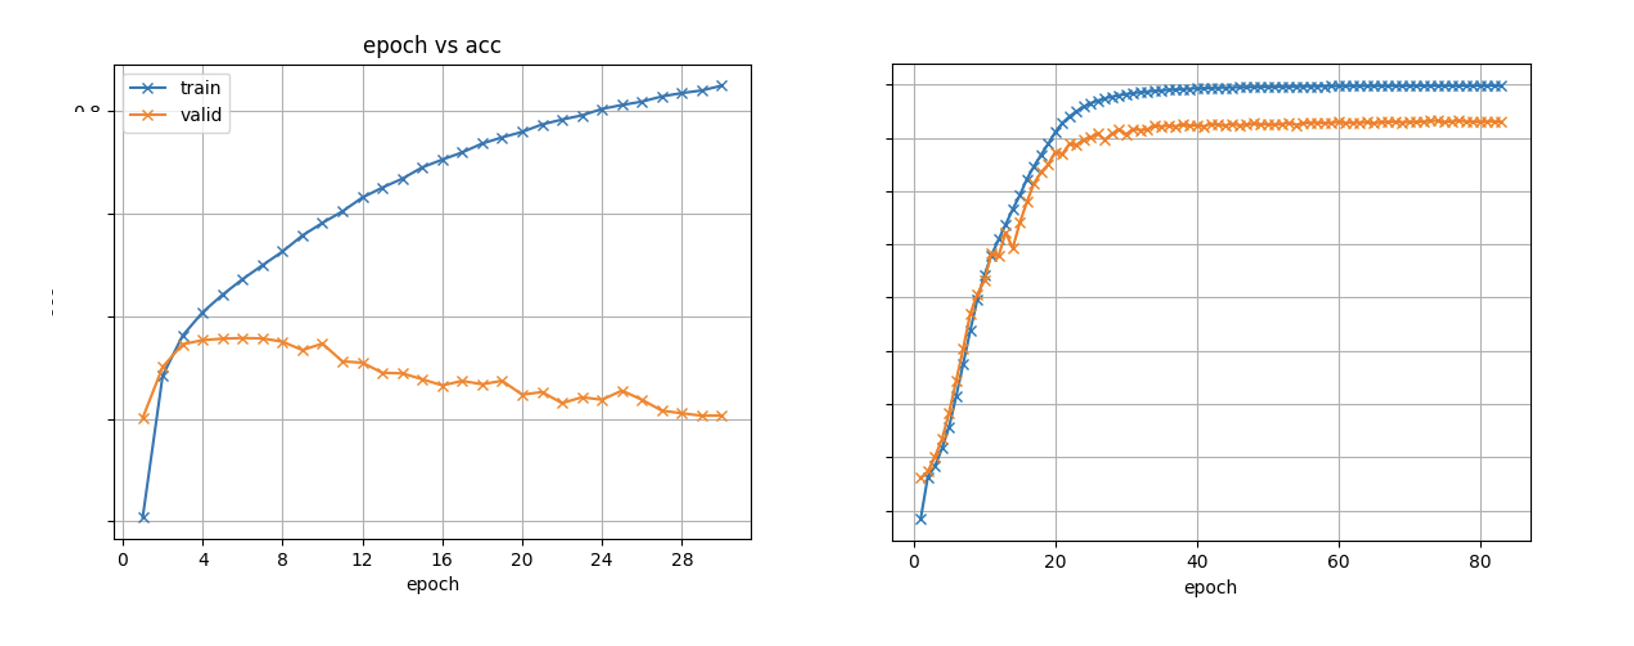

In [19]:
!./asr.sh --stage 11 --stop_stage 11 --train_set "train_as" --valid_set "dev_as" --test_sets "dev_as test_as" --lang "as" --speed_perturb_factors "0.9 1.0 1.1" --nj 1 --token_type bpe --nbpe 150 --ngpu 1 --asr_config "conf/tuning/train_asr_conformer5.yaml"

2023-05-15T09:58:36 (asr.sh:277:main) ./asr.sh --stage 11 --stop_stage 11 --train_set train_as --valid_set dev_as --test_sets dev_as test_as --lang as --speed_perturb_factors 0.9 1.0 1.1 --nj 1 --token_type bpe --nbpe 150 --ngpu 1 --asr_config conf/tuning/train_asr_conformer5.yaml
2023-05-15T09:58:36 (asr.sh:315:main) Info: The valid_set 'dev_as' is included in the test_sets. '--eval_valid_set true' is set and 'dev_as' is removed from the test_sets
2023-05-15T09:58:36 (asr.sh:559:main) Skipped stages:  9 14 15 16 
2023-05-15T09:58:36 (asr.sh:1295:main) Stage 11: ASR Training: train_set=dump/raw/train_as_sp, valid_set=dump/raw/dev_as
2023-05-15T09:58:36 (asr.sh:1387:main) Generate 'exp/asr_train_asr_conformer5_raw_as_bpe150_sp/run.sh'. You can resume the process from stage 11 using this script
2023-05-15T09:58:36 (asr.sh:1391:main) ASR training started... log: 'exp/asr_train_asr_conformer5_raw_as_bpe150_sp/train.log'
2023-05-15 09:58:37,243 (launch:94) INFO: /content/espnet/tools/anacon

In [22]:
!tail -n 2 /content/espnet/egs2/commonvoice/asr1/exp/asr_train_asr_conformer5_raw_as_bpe150_sp/train.log

# Accounting: time=4535 threads=1
# Ended (code 0) at Mon May 15 11:14:12 UTC 2023, elapsed time 4535 seconds


## Decoding and scoring (stage 12 - stage 13)

---

**Stage 12: Decoding**

Decode the data in the `test_sets` with the trained model in training_dir=exp/asr_train_asr_conformer5_raw_as_bpe150

* `--use_lm`: whether to use language model in decoding. Note that we make `--use_lm false` since we skip the language model in this example.
* `--inference_nj <N>`: specifies the number of inference jobs 
* `--inference_config`: defines the hyperparameters used for decoding, including beam_size, ctc_weight, etc. We do not specify a config in this example.

Please monitor the log `exp/asr_train_asr_conformer5_raw_as_bpe150/inference_asr_model_valid.acc.ave/dev_as/logdir/asr_inference.1.log`

In [23]:
# It would take ~10 minutes
!./asr.sh --inference_nj 1 --stage 12 --stop_stage 12 --train_set "train_as" --valid_set "dev_as" --test_sets "dev_as test_as" --lang "as" --speed_perturb_factors "0.9 1.0 1.1" --token_type bpe --nbpe 150 --asr_config "conf/tuning/train_asr_conformer5.yaml" --use_lm false

2023-05-15T11:34:46 (asr.sh:277:main) ./asr.sh --inference_nj 1 --stage 12 --stop_stage 12 --train_set train_as --valid_set dev_as --test_sets dev_as test_as --lang as --speed_perturb_factors 0.9 1.0 1.1 --token_type bpe --nbpe 150 --asr_config conf/tuning/train_asr_conformer5.yaml --use_lm false
2023-05-15T11:34:47 (asr.sh:315:main) Info: The valid_set 'dev_as' is included in the test_sets. '--eval_valid_set true' is set and 'dev_as' is removed from the test_sets
2023-05-15T11:34:47 (asr.sh:559:main) Skipped stages:  6 7 8 9 14 15 16 
2023-05-15T11:34:47 (asr.sh:1460:main) Stage 12: Decoding: training_dir=exp/asr_train_asr_conformer5_raw_as_bpe150_sp
2023-05-15T11:34:47 (asr.sh:1488:main) Generate 'exp/asr_train_asr_conformer5_raw_as_bpe150_sp/inference_asr_model_valid.acc.ave/run.sh'. You can resume the process from stage 12 using this script
2023-05-15T11:34:47 (asr.sh:1553:main) Decoding started... log: 'exp/asr_train_asr_conformer5_raw_as_bpe150_sp/inference_asr_model_valid.acc.av

**Stage 13: Scoring**

You can find word error rate (WER), character error rate (CER), token error rate (TER) etc. for each test set.

`sclite` from [SCTK](https://github.com/usnistgov/SCTK) is used for scoring.

General idea is to compute the edit-distance between the hypothesis and the reference sequences. When two sequences are aligned, there are four types of alignment relationships at each position:
* Correct (Corr)
* Substitution (Sub)
* Deletion (Del)
* Insersion (Ins)

error_rate: Err = (#Sub + #Del + #Ins) / (#Corr + #Sub + #Del), where (#Corr + #Sub + #Del) is equal to the length of the reference.

The final results of all error rates can be found in the file `exp/asr_train_asr_conformer5_raw_as_bpe150_sp/RESULTS.md`, where the columns mean:
 - Snt  : total number of sentences,
 - Wrd : total number of words, 
 - Corr : number of correct words,
 - Sub  : number of substitutions,
 - Del : number of deletions,
 - Ins : number of insertions,
 - **Err : word error rate**,
 - S.Err: sentence error rate.

Note: the column **Err** is the final error rate we usually check.

```
|dataset|Snt|Wrd|Corr|Sub|Del|Ins|Err|S.Err|                   
|---|---|---|---|---|---|---|---|---|                                                  
|decode_asr_lm_lm_train_lm_as_bpe150_valid.loss.ave_asr_model_valid.acc.ave/dev_as|124|1010|0.0|13.6|86.4|0.0|100.0|100.0|
|decode_asr_lm_lm_train_lm_as_bpe150_valid.loss.ave_asr_model_valid.acc.ave/test_as|41|314|0.0|14.3|85.7|0.0|100.0|100.0|
```

In [24]:
# It would take ~10 minutes
!./asr.sh --inference_nj 1 --stage 13 --stop_stage 13 --train_set "train_as" --valid_set "dev_as" --test_sets "dev_as test_as" --lang "as" --speed_perturb_factors "0.9 1.0 1.1" --token_type bpe --nbpe 150 --asr_config "conf/tuning/train_asr_conformer5.yaml" --use_lm false

2023-05-15T12:00:33 (asr.sh:277:main) ./asr.sh --inference_nj 1 --stage 13 --stop_stage 13 --train_set train_as --valid_set dev_as --test_sets dev_as test_as --lang as --speed_perturb_factors 0.9 1.0 1.1 --token_type bpe --nbpe 150 --asr_config conf/tuning/train_asr_conformer5.yaml --use_lm false
2023-05-15T12:00:34 (asr.sh:315:main) Info: The valid_set 'dev_as' is included in the test_sets. '--eval_valid_set true' is set and 'dev_as' is removed from the test_sets
2023-05-15T12:00:34 (asr.sh:559:main) Skipped stages:  6 7 8 9 14 15 16 
2023-05-15T12:00:34 (asr.sh:1601:main) Stage 13: Scoring
/content/espnet/tools/anaconda/envs/espnet/bin/python3 /content/espnet/espnet2/bin/tokenize_text.py -f 2- --input - --output - --cleaner none --token_type char --non_linguistic_symbols none --remove_non_linguistic_symbols true
/content/espnet/tools/anaconda/envs/espnet/bin/python3 /content/espnet/espnet2/bin/tokenize_text.py -f 2- --input - --output - --token_type char --non_linguistic_symbols none

In [25]:
!cat exp/asr_train_asr_conformer5_raw_as_bpe150_sp/RESULTS.md

<!-- Generated by scripts/utils/show_asr_result.sh -->
# RESULTS
## Environments
- date: `Mon May 15 12:00:49 UTC 2023`
- python version: `3.9.16 (main, Mar  8 2023, 14:00:05)  [GCC 11.2.0]`
- espnet version: `espnet 202304`
- pytorch version: `pytorch 1.13.1`
- Git hash: `e37968a7db0b33444329fdc4b6a90dd7ae17542f`
  - Commit date: `Fri May 12 06:31:39 2023 -0400`

## exp/asr_train_asr_conformer5_raw_as_bpe150_sp
### WER

|dataset|Snt|Wrd|Corr|Sub|Del|Ins|Err|S.Err|
|---|---|---|---|---|---|---|---|---|
|inference_asr_model_valid.acc.ave/test_as|41|314|0.3|26.8|72.9|0.0|99.7|100.0|

### CER

|dataset|Snt|Wrd|Corr|Sub|Del|Ins|Err|S.Err|
|---|---|---|---|---|---|---|---|---|
|inference_asr_model_valid.acc.ave/test_as|41|1881|14.1|26.5|59.4|1.4|87.3|100.0|

### TER

|dataset|Snt|Wrd|Corr|Sub|Del|Ins|Err|S.Err|
|---|---|---|---|---|---|---|---|---|
|inference_asr_model_valid.acc.ave/test_as|41|1284|9.3|44.9|45.7|2.9|93.5|100.0|

## exp/asr_train_asr_conformer5_raw_as_bpe150_sp/inference_asr

You can also check the break down of the error rates in /content/espnet/egs2/commonvoice/asr1/exp/asr_train_asr_conformer5_raw_as_bpe150

---
Taking `dev_as` as an example:

* Word error rate (WER): `inference_asr_model_valid.acc.ave/dev_as/score_wer/result.txt`
* Character error rate (CER): `inference_asr_model_valid.acc.ave/dev_as/score_cer/result.txt`
* Token error rate (TER): `inference_asr_model_valid.acc.ave/dev_as/score_ter/result.txt`

Please look at the row `Sum/Avg`. Format of the result.txt

```
SYSTEM SUMMARY PERCENTAGES by SPEAKER                      

,------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------.
|         exp/asr_train_asr_conformer5_raw_as_bpe150/inference_asr_model_valid.acc.ave/dev_as/score_wer/hyp.trn          |
|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| SPKR                                                                                                                             | # Snt # Wrd | Corr    Sub    Del    Ins    Err  S.Err |
|----------------------------------------------------------------------------------------------------------------------------------+-------------+-----------------------------------------|
| 006793c78af458b9ac24c9a45e41a2e4ae92363026a774dd0b101a9bd137ef5d2c124efbf5f3bde58c7cb495b8e35f7ba1521dba7572aab37959413b327180cc |    2      8 |100.0    0.0    0.0    0.0    0.0    0.0 |
|----------------------------------------------------------------------------------------------------------------------------------+-------------+-----------------------------------------|
...
|==========================================================================================================================================================================================|
| Sum/Avg                                                                                                                          | 1911   8603 | 65.3   30.0    4.7    2.2   36.9   63.6 |
|==========================================================================================================================================================================================|
|                                                               Mean                                                               |  8.1   36.6 | 65.6   29.8    4.6    3.4   37.8   61.7 |
|                                                               S.D.                                                               |  8.0   37.2 | 21.6   18.4    7.2    8.0   24.8   28.6 |
|                                                              Median                                                              |  5.0   23.0 | 66.7   28.6    2.5    0.0   34.8   66.7 |
`------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------'
```


# Requirements and Grading

You are expected to do the following:

1. [Optional] Following the [notebook](https://colab.research.google.com/drive/1tY6PxF_M5Nx5n488x0DrpujJOyqW-ATi?usp=sharing), prepare the environment on aws and run another language in the commonvoice recipe with the whole pipeline (including LM) and report the results. For example, the reference WERs of Arabic (lang=ar) are 35.6 / 36.9 on dev and test sets, respectively. This will earn you **B-**.

---
2. Train an E2E-ASR model with some other dataset (choose either task a or b).

  * Note1: **For 100 hours of speech, it usually takes about 1.5 days to train an E2E-ASR model with 1 GPU.** Please choose an appropriate corpus based on your available resources.

  * Note2: Please sign up which dataset you will work on before **March 14th** in the [sheet](https://docs.google.com/spreadsheets/d/13R0svSIt5OZEMOJqImjV30EZNJUxTrYD2ml5b7-4SlI/edit?usp=sharing).

  * Note3: If you have any questions, please refer to the [FAQ](https://github.com/espnet/espnet/wiki/FAQ) before post the questions to piazza.

  a). Run an existing recipe in [ESPnet](https://www.github.com/espnet/espnet) for languages other than English.
     
  * For the performance, you will refer to the best numbers in the `README.md` file of the recipe.
  * If you obtain comparable performance as in `README.md`, you will get **B**. If you obtain obvious improvement in terms of WER, you will get **B+**. 

  b). Train a speech recognition systems on a new speech dataset. We have prepared some candidate corpra in this [sheet](https://docs.google.com/spreadsheets/d/13R0svSIt5OZEMOJqImjV30EZNJUxTrYD2ml5b7-4SlI/edit?usp=sharing). Please feel free to propose other speech dataset that you prefer to work on.
      
  * You'll be asked to train an end-to-end speech recognition model based on a new speech dataset. This will earn you **B+**.
  * Some suggested steps are as follows:
    - [ ] Add your group information in the sheet to claim that you want to work on a specific dataset.
    - [ ] Following stage 1, implementing a bash script (local/data.sh) that include:
      * Download the dataset
      * Split the dataset into train / dev / test;
      * Perform text normalization, e.g. removing the punctuation, unifying letter case, etc.
      * Prepare the data in Kaldi style
    - [ ] Following stage 2-4, do speed perturbation if necessary and dump the audio file;
    - [ ] Prepare the tokenization model as in stage 5;
    - [ ] Train the language model (LM) following the stages 6 - 9;
    - [ ] Train the end-to-end speech recognition model (E2E-ASR), following the stages 10 - 11;
    - [ ] Decoding and scoring the dev and test sets with your system (LM + E2E-ASR), following the stages 12-13;

* We usually use **word error reduction rate reduction (WERR)** to measure the performance: `WERR = (old_WER - new_WER) / old_WER`. Generally speaking, 5% is a threshold. However, if the `old_WER` is very bad, then the expected WERR would be higher.

---

3. Apply self-supervised learning representations.
   
   You can use the self-supervised learning representations as speech features (a tutorial can be found [here](https://espnet.github.io/espnet/espnet2_tutorial.html#usage-of-self-supervised-learning-representations-as-feature)). We recommend you to use [HuBERT](https://arxiv.org/abs/2106.07447) or [Wav2Vec2.0](https://arxiv.org/abs/2006.11477) and their variants, e.g. [XLSR](https://arxiv.org/abs/2006.13979), [WavLM](https://arxiv.org/abs/2110.13900).
   This will earn you
   * **A** if you achieve obvious improvement in Word Error Rate (WER) than log-mel filterbank feature (Default frontend).
   * **A-** otherwise.

---

4. [Extra Bonus] The final step is to make a **Pull Request** (PR) to ESPnet. 
   
   First, you must follow this [tutorial for making a recipe](https://github.com/espnet/espnet/blob/master/CONTRIBUTING.md#132-espnet2-recipes) to clean and fix your scripts. Then you should follow the [tutorial for PR](https://github.com/espnet/espnet/blob/master/CONTRIBUTING.md#2-pull-request). You are required to follow the principles of ESPnet recipes and to pass all the CI tests. 
   
   This will earn you some bonus points to your prevous efforts. You will probably hit **A+** if you already satisfy A level.

   - [ ] If you choose to work on a new dataset, you'll have to make a data preparation scripts according to the dataset, including data download, generate the train / dev / test sets in kaldi style. You can refer to the `local/data.sh` in some other recipes for more details.
   - [ ] Prepare the configuration file in `conf/tuning`.
   - [ ] Add your results and misc. information in the README.md in the recipe directory.
   - [ ] Upload you model to HuggingFace and put it in the README.md.

---

5. [Extra bonus] Other techniques.
   
   Other than the above steps, you can do some other extensions (of equal or greater efforts) that you can think of. For example, you can implement some existing techniques that is benefitial to the performance and prove it with experiments.
